In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2024-03-07 21:34:48.511107: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 21:34:48.619526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 21:34:48.621091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 21:34:50.053808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
print(f"X_train: {len(X_train)}\nX_test: {len(X_test)}")

X_train: 60000
X_test: 10000


In [7]:
X_train[0].shape

(28, 28)

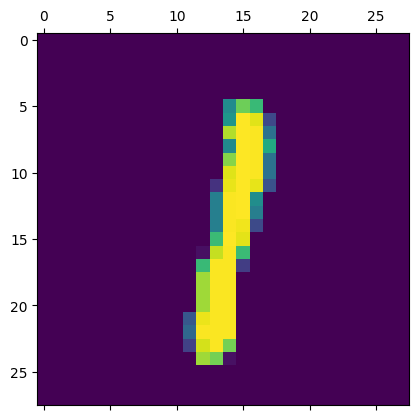

In [10]:
plt.matshow(X_train[1200])